<a href="https://colab.research.google.com/github/komalmagar/Image-recognation-using-DL/blob/main/PracticalNumber_5(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
###Linear regression with regularization

Conclusion is written at the end of this of the code

In [6]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def load_boston_df():   ##Loading database
    from sklearn import datasets
    boston_data = datasets.load_boston()
    columns_to_use = ['data','target','feature_names']
    boston_data = dict([(i,boston_data[i]) for i in columns_to_use])
    df = pd.DataFrame(columns=boston_data['feature_names'], data=boston_data['data'])
    df['target'] = boston_data['target']
    return df

In [7]:
df = load_boston_df()

In [9]:
train_columns = list(df.columns)  ##Splitting data
target_column = train_columns.pop(-1)
seed=5

In [10]:
train_set, test_set = train_test_split(df,test_size=0.20, random_state=seed)   ###Trining data
X_train, y_train, X_test, y_test = train_set[train_columns], train_set[target_column],\
test_set[train_columns], test_set[target_column]

In [11]:
scaler = MinMaxScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [13]:
alpha = 0.001  ##Regularization value

In [15]:
clf = Lasso(alpha=alpha,random_state=seed)    ##Lasso is regression method
clf.fit(X_train,y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=5,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
y_predicted_train = clf.predict(X_train)  ##Prediction for trainning data
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 22.47792881584351


In [18]:
y_predicted_test = clf.predict(X_test) ##Prediction on testing data
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 20.816225606673914


Polynomial regression with regularization

In [19]:
from sklearn.preprocessing import PolynomialFeatures
C =2   ##Degree for polynomial function

In [20]:
poly = PolynomialFeatures(C)
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)


In [22]:
alpha = 0.001  ##alpha - regularization strength
max_iter = 100000  ##max_iter - number of iterations of the algorithm
clf = Lasso(alpha=alpha,max_iter=max_iter,random_state=seed)  ##Apply regression
clf.fit(poly_features_train,y_train)  ##Fitting the model

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=5,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
y_predicted_train = clf.predict(poly_features_train)
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 6.888172818405282


In [24]:
y_predicted_test = clf.predict(poly_features_test)
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))


Mean squared error on test data : 8.757905842763236


Now do the plotting

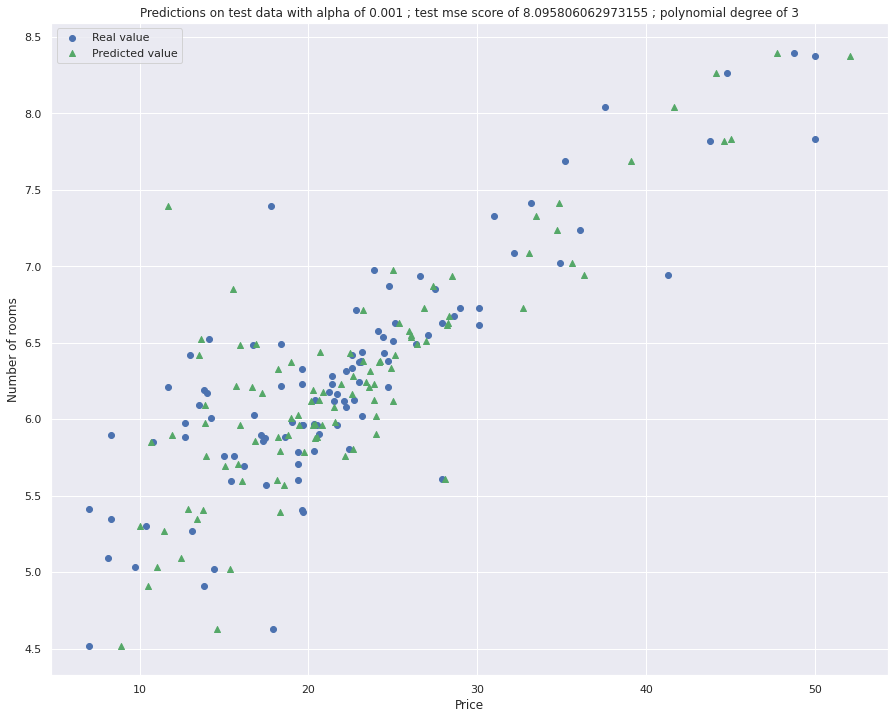

In [26]:
import numpy as np
sns.set()
def plot_boundaries(alpha=0.1,C=2, max_iter=100000):
    clf = Lasso(alpha=alpha,max_iter=max_iter)
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_test = clf.predict(poly_features_test)
    mae = mean_squared_error(y_predicted_test,y_test)
    plt.figure(figsize=(15,12))
    plt.title('Predictions on test data with alpha of {0} ; test mse score of {1} ; polynomial degree of {2}'.format(alpha,mae, C))
    plt.scatter(y_test,test_set['RM'])
    plt.scatter(y_predicted_test, test_set['RM'],color='g', marker='^')
    plt.ylabel('Number of rooms')
    plt.xlabel('Price')
    plt.legend(['Real value','Predicted value'])
plot_boundaries(alpha=0.001,C=3)


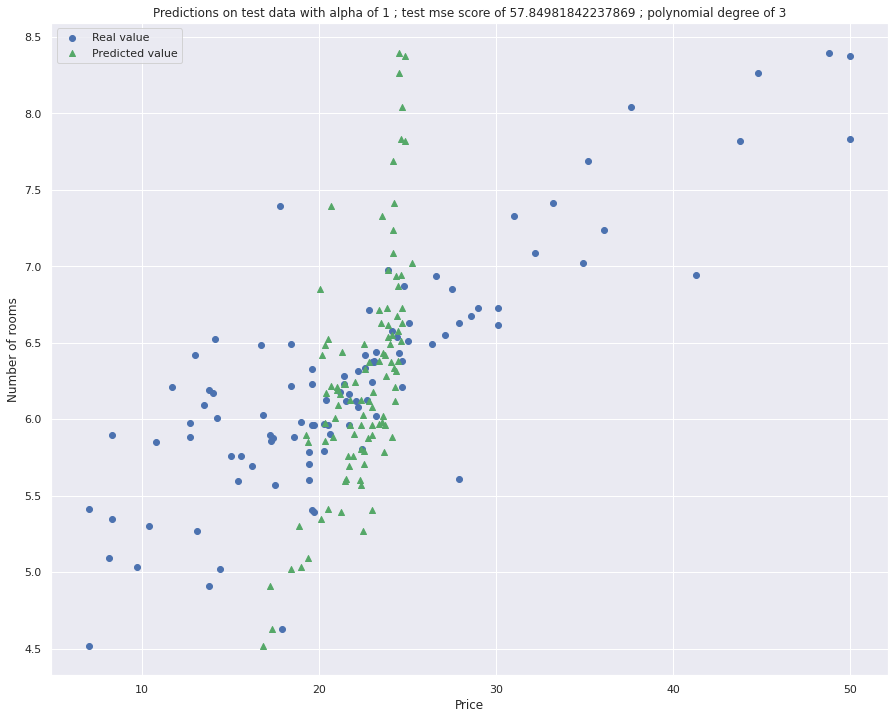

In [27]:
plot_boundaries(alpha=1, C=3)

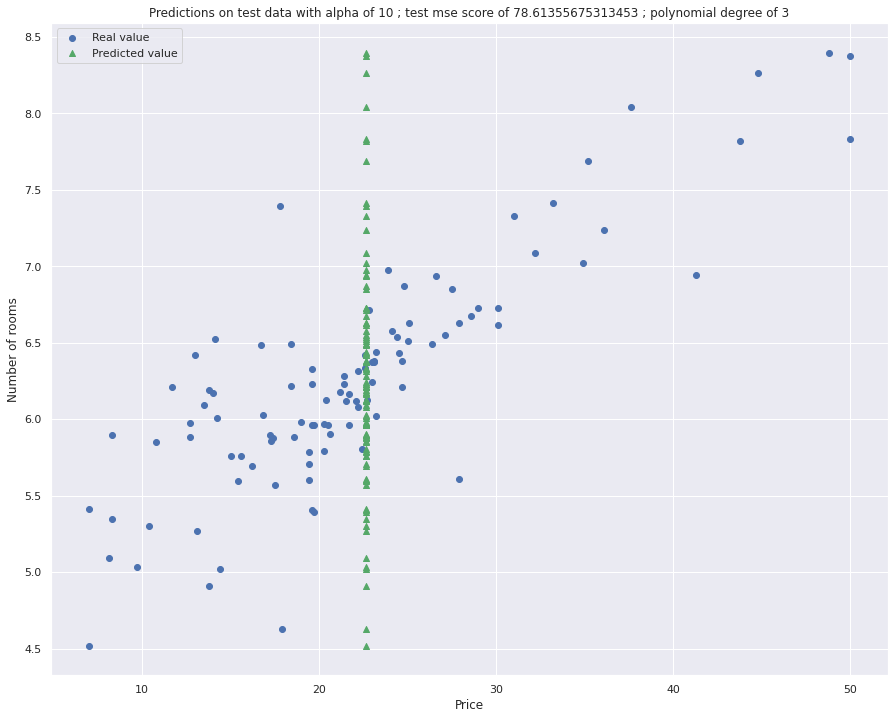

In [28]:
plot_boundaries(alpha=10, C=3)

# **As we keep less value for alpha polynomial model shows good accuracy**

**L2 regularization**

In [ ]:
C = 3  ##degree 
poly = PolynomialFeatures(C)
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)
alpha = 0.1  ###alpha - regularization strength
max_iter = 1000000  #max_iter - number of iterations of the algorithm

In [30]:
clf = Ridge(alpha=alpha,max_iter=max_iter,random_state=seed)
clf.fit(poly_features_train,y_train)##Fitting the model

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=5, solver='auto', tol=0.001)

In [31]:
y_predicted_train = clf.predict(poly_features_train)  ##predicting trained data
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))
y_predicted_test = clf.predict(poly_features_test)  ##predicting test data
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on train data : 5.987402410731071
Mean squared error on test data : 9.074571137883702


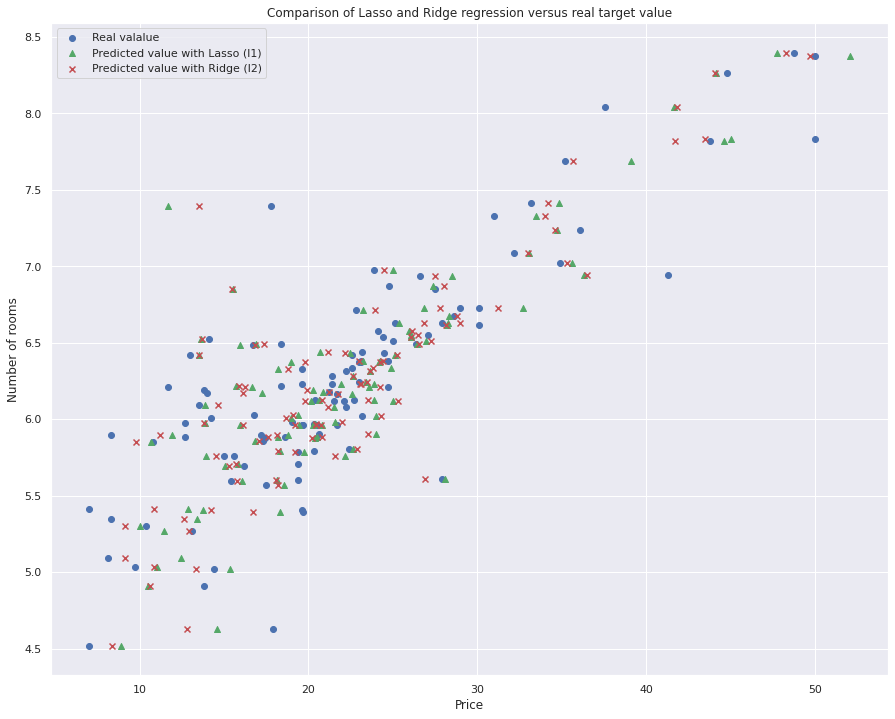

In [33]:
##Find differenc between L1 and L2
def plot_bestresults_comparison():
    clf = Ridge(alpha=0.1,max_iter=1000000,random_state=seed)
    C = 3
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_ridge = clf.predict(poly_features_test)
    clf = Lasso(alpha=0.001,max_iter=1000000)
    C = 3
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_lasso = clf.predict(poly_features_test)
    plt.figure(figsize=(15,12))
    plt.title('Comparison of Lasso and Ridge regression versus real target value')
    plt.scatter(y_test,test_set['RM'])
    plt.scatter(y_predicted_lasso, test_set['RM'],color='g', marker='^')
    plt.scatter(y_predicted_ridge,test_set['RM'],color='r',marker='x')
    plt.ylabel('Number of rooms')
    plt.xlabel('Price')
    plt.legend(['Real valalue','Predicted value with Lasso (l1)','Predicted value with Ridge (l2)'])
plot_bestresults_comparison()

In [34]:
##Finding actual difference
def show_dif():
    clf = Ridge(alpha=0.1,max_iter=1000000)
    C = 3
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_lasso = clf.predict(poly_features_test)
    df = pd.DataFrame({'Predicted price' : y_predicted_lasso, 'Real price' : y_test.values })
    pd.set_option('display.max_rows', df.shape[0]+1)
    display(df)
show_dif()

,Predicted price,Real price
0,41.834215,37.6
1,28.984688,27.9
2,25.245185,22.6
3,10.619818,13.8
4,35.651344,35.2
5,9.116652,10.4
6,24.496188,23.9
7,27.793303,29.0
8,23.945719,22.8
9,21.128500,23.2


# **Conclusion we should test our model with different alpha values(regularization strength) .Everytime results will be different with different datasets and L1 ,L2**